# Conversion of HTML files

This example shows how to convert HTML files to a structured Docling Document.

Three examples are given:
- HTML ignoring images
- HTML with images parsed as references
- HTML with images parsed inline

## HTML ignoring images

In [1]:
from docling_core.types.doc import ImageRefMode

from docling.backend.html_backend import (
    HTMLDocumentBackend,
    HTMLDocumentBackendImagesInline,
    HTMLDocumentBackendImagesReferenced,
)
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.document_converter import (
    DocumentConverter,
    HTMLFormatOption,
    PdfFormatOption,
)
from docling.pipeline.simple_pipeline import SimplePipeline

In [2]:
def pdf_pipeline():
    pipeline_options = PdfPipelineOptions()
    pipeline_options.do_ocr = True
    pipeline_options.do_table_structure = True
    pipeline_options.do_picture_description = True
    pipeline_options.table_structure_options.do_cell_matching = True
    pipeline_options.generate_page_images = True
    return pipeline_options

In [3]:
# Using the HTMLDocumentBackend to convert HTML files. Images will be ignored
doc_converter = (
    DocumentConverter(  # all of the below is optional, has internal defaults.
        allowed_formats=[
            InputFormat.HTML,
        ],  # whitelist formats, non-matching files are ignored.
        format_options={
            InputFormat.HTML: HTMLFormatOption(
                pipeline_cls=SimplePipeline, backend=HTMLDocumentBackend
            ),
            InputFormat.PDF: PdfFormatOption(pipeline_options=pdf_pipeline()),
        },
    )
)

In [4]:
from IPython.display import Latex, Markdown, display

html_file = "../../tests/data/html/example_08.html"
result = doc_converter.convert(html_file)
document = result.document
markdown = document.export_to_markdown()
display(Markdown(markdown))

# Introduction to parsing HTML files withDocling

Docling simplifies document processing, parsing diverse formats — including HTML — and providing seamless integrations with the gen AI ecosystem.

### Supported file formats

Docling supports multiple file formats..

- Advanced PDF understanding
- Microsoft Office DOCX
- HTML files (with optional support for images)

#### Three backends for handling HTML files

Docling has three backends for parsing HTML files:

1. HTMLDocumentBackend Ignores images
2. HTMLDocumentBackendImagesInline Extracts images inline
3. HTMLDocumentBackendImagesReferenced Extracts images as references

## HTML with images as references

In [5]:
# Using the HTMLDocumentBackend to convert HTML files. Images will be extracted as references
doc_converter = (
    DocumentConverter(  # all of the below is optional, has internal defaults.
        allowed_formats=[
            InputFormat.HTML,
        ],  # whitelist formats, non-matching files are ignored.
        format_options={
            InputFormat.HTML: HTMLFormatOption(
                pipeline_cls=SimplePipeline, backend=HTMLDocumentBackendImagesReferenced
            ),
            InputFormat.PDF: PdfFormatOption(pipeline_options=pdf_pipeline()),
        },
    )
)

In [6]:
from IPython.display import Latex, Markdown, display

html_file = "../../tests/data/html/example_08.html"
result = doc_converter.convert(html_file)
document = result.document
markdown = document.export_to_markdown(image_mode=ImageRefMode.REFERENCED)
# Does not show otherwise. Not sure why
markdown = markdown.replace("file://", "")
display(Markdown(markdown))

# Introduction to parsing HTML files withDocling

Docling

![Image](https://docling-project.github.io/docling/assets/logo.png)

Docling simplifies document processing, parsing diverse formats — including HTML — and providing seamless integrations with the gen AI ecosystem.

### Supported file formats

Docling supports multiple file formats..

- Advanced PDF understanding
- PDF

![Image](../assets/pdf.png)
- Microsoft Office DOCX
- DOCX

![Image](../assets/docx.png)
- HTML files (with optional support for images)
- HTML

![Image](../assets/html.png)

#### Three backends for handling HTML files

Docling has three backends for parsing HTML files:

1. HTMLDocumentBackend Ignores images
2. HTMLDocumentBackendImagesInline Extracts images inline
3. HTMLDocumentBackendImagesReferenced Extracts images as references

## HTML with images inline

In [7]:
# Using the HTMLDocumentBackend to convert HTML files. Images will be extracted as references
doc_converter = (
    DocumentConverter(  # all of the below is optional, has internal defaults.
        allowed_formats=[
            InputFormat.HTML,
        ],  # whitelist formats, non-matching files are ignored.
        format_options={
            InputFormat.HTML: HTMLFormatOption(
                pipeline_cls=SimplePipeline, backend=HTMLDocumentBackendImagesInline
            ),
            InputFormat.PDF: PdfFormatOption(pipeline_options=pdf_pipeline()),
        },
    )
)

Could not load image (src=https://github.com/docling-project/docling/tree/main/docs/assets/pdf.png): cannot identify image file <_io.BytesIO object at 0x73d26d7658a0>
Could not load image (src=https://github.com/docling-project/docling/tree/main/docs/assets/docx.png): cannot identify image file <_io.BytesIO object at 0x73d2675e5170>
Could not load image (src=https://github.com/docling-project/docling/tree/main/docs/assets/html.png): cannot identify image file <_io.BytesIO object at 0x73d2675e4c20>


# Introduction to parsing HTML files withDocling

Docling

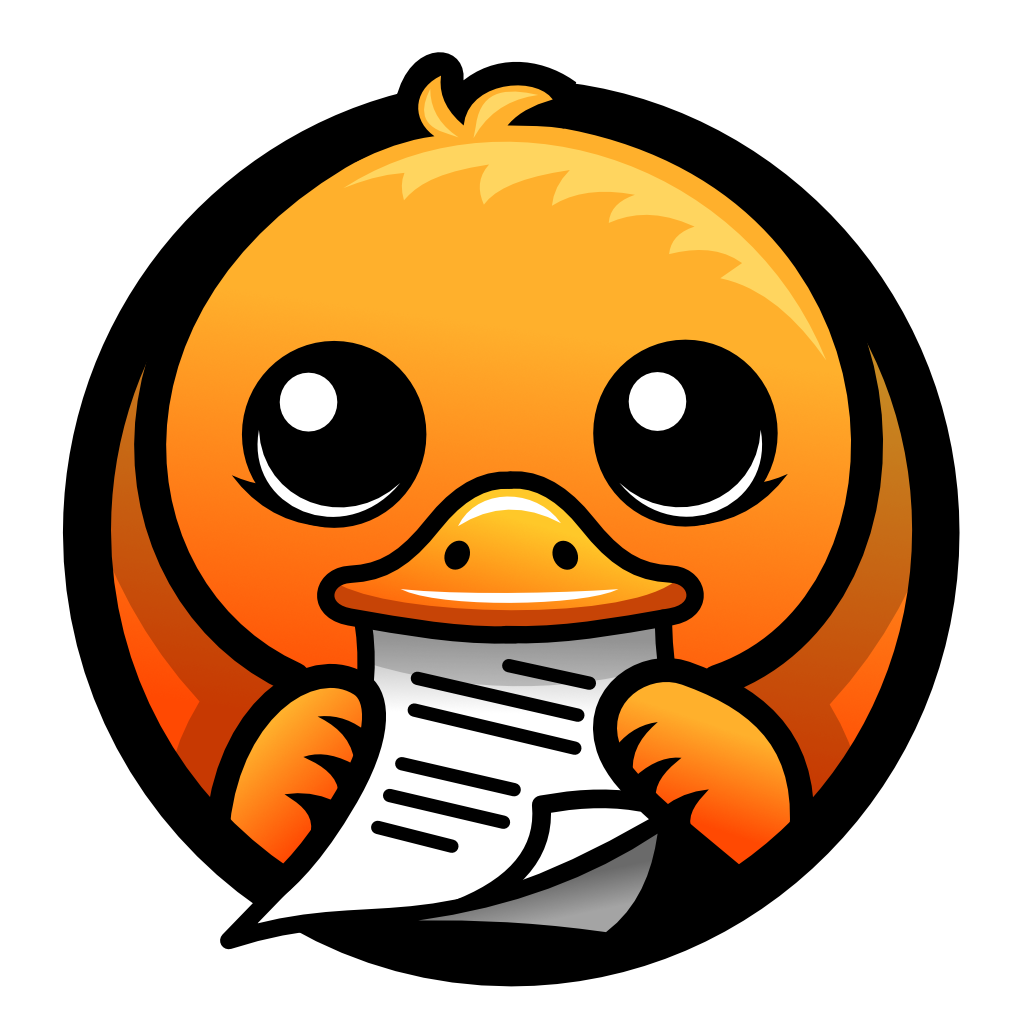

Docling simplifies document processing, parsing diverse formats — including HTML — and providing seamless integrations with the gen AI ecosystem.

### Supported file formats

Docling supports multiple file formats..

- Advanced PDF understanding
- PDF
- Microsoft Office DOCX
- DOCX
- HTML files (with optional support for images)
- HTML

#### Three backends for handling HTML files

Docling has three backends for parsing HTML files:

1. HTMLDocumentBackend Ignores images
2. HTMLDocumentBackendImagesInline Extracts images inline
3. HTMLDocumentBackendImagesReferenced Extracts images as references

In [8]:
from IPython.display import Latex, Markdown, display

html_file = "../../tests/data/html/example_09.html"
result = doc_converter.convert(html_file)
document = result.document
markdown = document.export_to_markdown(image_mode=ImageRefMode.EMBEDDED)
display(Markdown(markdown))